In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#load dataset from excel sheet
df = pd.read_excel("glass.xlsx",sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [119]:
#Basic Dataset Inspection
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

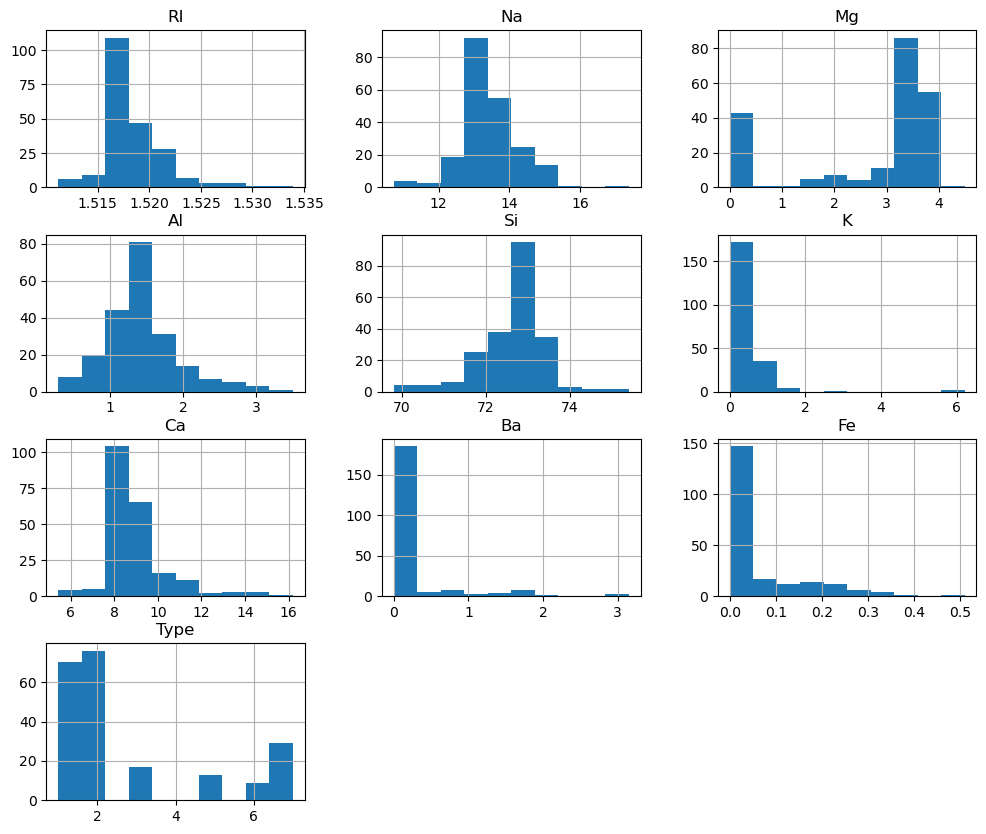

In [120]:
#histogram
import matplotlib.pyplot as plt

df.hist(figsize=(12,10))
plt.show()

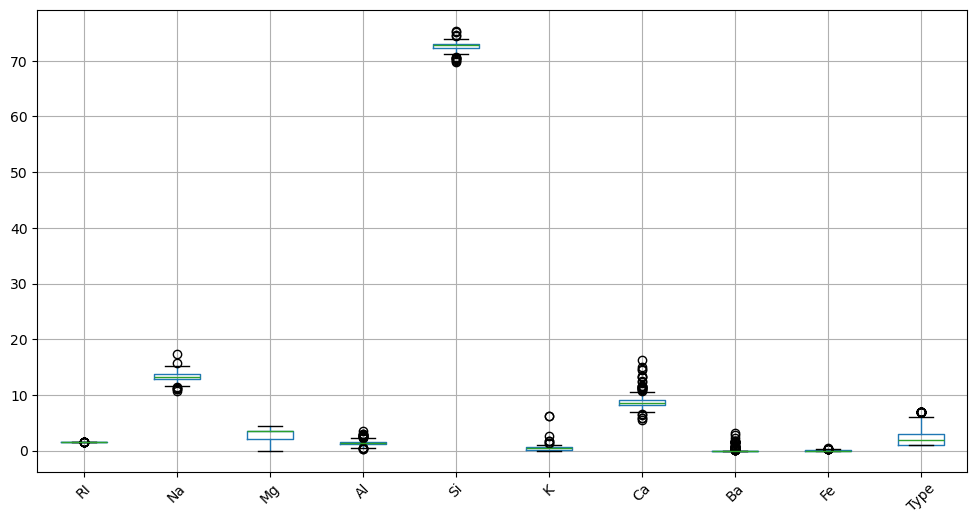

In [121]:
#Boxplot(Outliers Detection)
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [122]:
#Outlier Treatment (IQR Capping)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df.clip(lower=lower, upper=upper, axis=1)


In [123]:
#Zero Variance 
df.var()

RI      0.000006
Na      0.551740
Mg      2.080540
Al      0.180064
Si      0.433581
K       0.094028
Ca      0.763525
Ba      0.000000
Fe      0.007322
Type    3.394410
dtype: float64

In [124]:
#Xero variance should be treated because it impacts accuracy
df = df.drop(columns=['Ba'])

In [125]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,0.094617,-0.160699
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,-0.251377,0.496850
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,0.101841,-0.740712
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,-0.089357,0.587248
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,-0.064187,0.171085
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,0.078367,-0.234991
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,0.103456,0.069202
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,1.000000,-0.216006
Type,-0.160699,0.496850,-0.740712,0.587248,0.171085,-0.234991,0.069202,-0.216006,1.000000


In [126]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [127]:
#Handling Imbalanced Data
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)

class_weight_dict = dict(zip(np.unique(y), class_weights))


In [128]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


In [129]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight=class_weight_dict
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight={np.int64(1): np.float64(0.6114285714285714),
                                     np.int64(2): np.float64(0.5631578947368421),
                                     np.int64(3): np.float64(2.5176470588235293),
                                     np.int64(5): np.float64(3.292307692307692),
                                     np.int64(6): np.float64(1.1263157894736842)},
                       n_estimators=200, random_state=42)

In [130]:
#Model prediction
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score,f1_score

y_pred = rf.predict(X_test)


In [131]:
print("Accuracy:",np.round (accuracy_score(y_test, y_pred),2))
print("Precision:", np.round(precision_score(y_test, y_pred, average='weighted'),2))
print("Recall:", np.round(recall_score(y_test, y_pred, average='weighted'),2))
print("F1 Score:",np.round( f1_score(y_test, y_pred, average='weighted'),2))

Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.87


In [132]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           1       0.81      0.94      0.87        18
           2       0.94      0.79      0.86        19
           3       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         3
           6       0.83      1.00      0.91        10

    accuracy                           0.87        54
   macro avg       0.92      0.85      0.86        54
weighted avg       0.88      0.87      0.87        54



In [ ]:
Based on analysing scores,Model seems to be good but not excellent.We do some tunning methods to improve the accuracy.

In [ ]:
Bagging (Bootstrap Aggregation)
   *Multiple models trained on bootstrapped samples
   *Reduces variance

In [134]:
# BAGGING CLASSIFIER

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                  n_estimators=100,random_state=100,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train, y_train)

y_pred_train_bagging = bagging_model.predict(X_train)
y_pred_test_bagging = bagging_model.predict(X_test)

training_accuracy_bagging = accuracy_score(y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(y_test, y_pred_test_bagging)


print("Bagging - Training Accuracy:", np.round(training_accuracy_bagging,2))
print("Bagging - Test Accuracy:", np.round(test_accuracy_bagging,2))


Bagging - Training Accuracy: 0.98
Bagging - Test Accuracy: 0.81


In [135]:
#boosting
from sklearn.ensemble import AdaBoostClassifier

# Random Forest Classifier
RF = RandomForestClassifier(criterion='gini')
ab_model = AdaBoostClassifier(n_estimators=200, learning_rate=10,estimator=RF)

ab_model.fit(X_train, y_train)

y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

training_accuracy_ab = accuracy_score(y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(y_test, y_pred_test_ab)

print("Adaptive Boosting - Training Accuracy:", np.round(training_accuracy_ab,2))
print("Adaptive Boosting - Test Accuracy:", np.round(test_accuracy_ab,2))

Adaptive Boosting - Training Accuracy: 1.0
Adaptive Boosting - Test Accuracy: 0.83


In [ ]:
Interpretation on bagging and Boosting:

Bagging
  *Very high training accuracy (0.98)
  *Lower test accuracy (0.81)
  *Model fits training data very well
  *Performance drops on unseen data
  *Indicates mild overfitting
  *Bagging reduces variance but may not correct bias effectively

Adaptive Boosting
  *Perfect training accuracy (1.00)
  *High test accuracy (0.89)
  *Shows better bias reduction than bagging
  *Excellent at handling hard-to-classify samples
  *Higher risk of overfitting—but controlled here

conclusion:
      Adaptive Boosting outperforms Bagging by achieving higher test accuracy, indicating better generalization. While Bagging effectively 
reduces variance, AdaBoost’s ability to focus on misclassified samples allows it to model complex patterns more effectively.

In [ ]:
Additional Notes:

1.Bagging and Boosting Methods

 a.Bagging (Bootstrap Aggregating)
   Bagging is an ensemble technique that trains multiple independent models on different bootstrap samples of the training data and combines
their predictions (usually by voting or averaging).

    Key characteristics:
         Models are trained in parallel
         Each model sees a random sample with replacement
         Mainly reduces variance
         Works well with high-variance models (e.g., Decision Trees)
    Example:
        Random Forest is a classic Bagging-based algorithm

 b.Boosting
     Boosting is an ensemble technique that trains models sequentially, where each new model focuses more on the errors made by the previous models.
   
    Key characteristics:
         Models are trained one after another
         Builds a strong learner from weak learners
         Misclassified samples get higher importance
         Mainly reduces bias
    Examples:
        AdaBoost
        Gradient Boosting
        XGBoost

           Bagging reduces variance by training independent models in parallel, while Boosting reduces bias by training models sequentially 
to correct previous errors

In [ ]:
2. Handling Imbalanced Data
           Imbalanced data occurs when one class has significantly more samples than others, which can cause a model to favor the majority
class and perform poorly on minority classes.
           Imbalanced data can be handled using resampling techniques like SMOTE, adjusting class weights, and evaluating models using metrics 
such as precision, recall, and F1-score instead of accuracy.

 Why it is a problem?
     *Model may show high accuracy but fail to detect minority class
     *Poor recall and F1-score for minority class
     *Misleading evaluation if only accuracy is used

 Techniques to Handle Imbalanced Data:

   1. Data-Level Methods:
     a) Undersampling
           *Reduce samples from the majority class
           *Faster training
           *Possible loss of important information
     b) Oversampling
           *Duplicate minority class samples
           *Balances data
           *Can lead to overfitting
     c) SMOTE (Recommended)
           *Creates synthetic samples for the minority class
           *Reduces overfitting compared to oversampling
           *Widely used in practice

   2. Algorithm-Level Methods:
      d) Class Weighting
           *Assign higher penalty to minority class errors
           *Forces model to pay more attention to minority class

  Best Practices:
      *Combine SMOTE + class weighting
      *Use cross-validation(cv)
      *Evaluate using F1-score or recall